In [8]:
import os, sys, time, resource, re, gc, shutil
from multiprocess import Pool
from functools import partial
from tabulate import tabulate
from urllib.parse import urlparse, parse_qsl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mongoengine.queryset.visitor import Q
import django
from django.db.models import Count
sys.path.append('/home/galm/software/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
from django.db.models import F

In [32]:
dts = DocTopic.objects.filter(run_id=44).values('topic__title')

dts = dts.annotate(
    ipcc = models.Sum(
        models.Case(
            models.When(doc__ipccref__isnull=False,then=F('score')),default=0, output_field=models.FloatField()
        )
    ),
    no_ipcc = models.Sum(
        models.Case(
            models.When(doc__ipccref__isnull=True,then=F('score')),default=0, output_field=models.FloatField()
        )
    )
)
df =  pd.DataFrame.from_dict(list(dts))

In [33]:
df['total'] = df.ipcc+df.no_ipcc
df['ipcc_pcnt'] = df.ipcc/df.total*100
df = df.sort_values(by='ipcc_pcnt', ascending=0).reset_index(drop=True)
df.head()

,ipcc,no_ipcc,topic__title,total,ipcc_pcnt
0,9.141689,136.590431,"{adapt, vulner, capac}",145.732121,0.062729
1,6.376264,101.073214,"{aerosol, forc, radiat}",107.449478,0.059342
2,6.017779,106.879678,"{uncertainti, estim, paramet}",112.897457,0.053303
3,8.445060,152.134004,"{scenario, project, futur}",160.579064,0.052591
4,4.339594,101.709509,"{ozon, stratospher, tropospher}",106.049103,0.040921


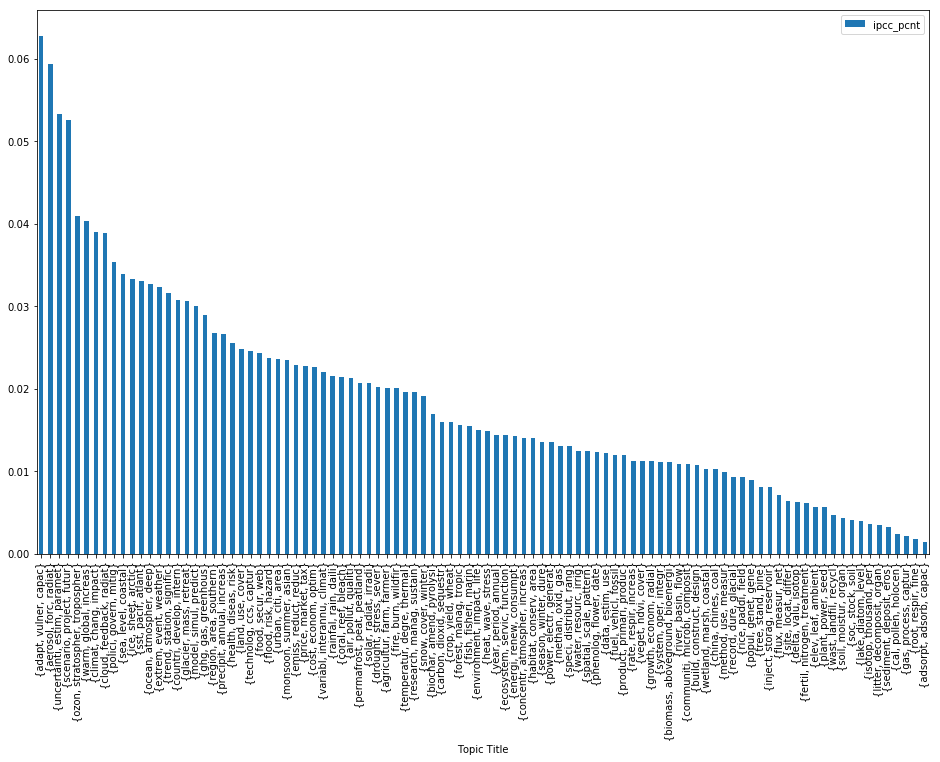

In [35]:
plt.rcParams["figure.figsize"] = [16,10]
df.set_index(['topic__title'])[['ipcc_pcnt']]
bdf.plot.bar();
plt.xlabel('Topic Title')
plt.show()